In [15]:
import pandas as pd
import reviews_explore as e
import reviews_exp_vis as v

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ny = pd.read_csv('ny_reviews_processed.csv')
ny.head()

,camis,dba,boro,phone,inspection_date,latitude,longitude,cuisine_description,action,score,grade,full_address,violation_code,violation_description,last_inspection_date,reviews
0,40365904,MEE SUM CAFE,Manhattan,2123495260,2021-10-13,40.714861,-73.9982,Coffee/Tea,Violations cited,67,C,26 PELL STREET 10013,10B 08A 02B 04N 02G 04A 10F 06C 05D 06F 09C,Plumbing not properly installed or maintained;...,2020-10-13,authentic place point needed lot help managed ...
1,40365904,MEE SUM CAFE,Manhattan,2123495260,2021-11-24,40.714861,-73.9982,Coffee/Tea,Violations cited,24,B,26 PELL STREET 10013,02B 06C 10F 02G 10B,Hot food item not held at or above 140º F. Foo...,2021-10-13,really great classic chinese comfort food grea...
2,40365904,MEE SUM CAFE,Manhattan,2123495260,2022-06-27,40.714861,-73.9982,Coffee/Tea,Violations cited,50,C,26 PELL STREET 10013,10E 10B 09C 06C 04A 02G 02B 06D 10F,Accurate thermometer not provided in refrigera...,2021-11-24,great spot cheap eats didnt time take photo wa...
3,40365904,MEE SUM CAFE,Manhattan,2123495260,2022-09-30,40.714861,-73.9982,Coffee/Tea,Violations cited,59,C,26 PELL STREET 10013,06F 04A 06D 02I 02B 10B 02G 06C 10F,"Wiping cloths not stored clean and dry, or in ...",2022-06-27,great place home cooking friendly delicious ca...
4,40365904,MEE SUM CAFE,Manhattan,2123495260,2023-04-14,40.714861,-73.9982,Coffee/Tea,Violations cited,36,C,26 PELL STREET 10013,02G 06D 10F 10B 04A 02I,Cold TCS food item held above 41 °F; smoked or...,2022-09-30,great dim sum cafe open early popular place fa...


In [3]:
ny.shape

(4098, 16)

In [4]:
ny = ny[ny.reviews.notna()]
ny.shape

(4070, 16)

In [5]:
ny = ny.drop(columns=['latitude', 'longitude', 'phone', 'action', 'full_address', 'violation_code', 'violation_description'])

In [6]:
ny.head()

,camis,dba,boro,inspection_date,cuisine_description,score,grade,last_inspection_date,reviews
0,40365904,MEE SUM CAFE,Manhattan,2021-10-13,Coffee/Tea,67,C,2020-10-13,authentic place point needed lot help managed ...
1,40365904,MEE SUM CAFE,Manhattan,2021-11-24,Coffee/Tea,24,B,2021-10-13,really great classic chinese comfort food grea...
2,40365904,MEE SUM CAFE,Manhattan,2022-06-27,Coffee/Tea,50,C,2021-11-24,great spot cheap eats didnt time take photo wa...
3,40365904,MEE SUM CAFE,Manhattan,2022-09-30,Coffee/Tea,59,C,2022-06-27,great place home cooking friendly delicious ca...
4,40365904,MEE SUM CAFE,Manhattan,2023-04-14,Coffee/Tea,36,C,2022-09-30,great dim sum cafe open early popular place fa...


In [7]:
ny.grade.unique()

array(['C', 'B', 'A'], dtype=object)

In [8]:
counts = e.counts_and_ratios(ny, "grade")
counts

,n,percent
grade,,
A,2392,0.587715
B,970,0.238329
C,708,0.173956


In [9]:
a_reviews, b_reviews, c_reviews, all_reviews = e.join_text(ny)
a_words, b_words, c_wordss, all_words = e.list_words(ny)
a_freq, b_freq, c_freq, all_freq = e.word_freq(ny)

In [100]:
word_counts = e.word_counts(ny, reset_index=False)

In [101]:
word_counts.head(5)

,All,A,B,C
wa,50463,25948,13439,11076
food,36404,18234,9865,8305
good,25900,13560,6751,5589
great,22987,12039,6125,4823
place,19657,10440,5048,4169


In [102]:
word_counts['A '] = round((word_counts['A'] / word_counts['All']) * 100,0)
word_counts['B '] = round((word_counts['B'] / word_counts['All']) * 100,0)
word_counts['C '] = round((word_counts['C'] / word_counts['All']) * 100,0)
word_counts.head()

,All,A,B,C,A,B,C
wa,50463,25948,13439,11076,51.0,27.0,22.0
food,36404,18234,9865,8305,50.0,27.0,23.0
good,25900,13560,6751,5589,52.0,26.0,22.0
great,22987,12039,6125,4823,52.0,27.0,21.0
place,19657,10440,5048,4169,53.0,26.0,21.0


In [105]:
word_counts_prop = word_counts[(word_counts['C'] > 100) & (word_counts['A '] < word_counts['C ']) & (word_counts['B '] < word_counts['C '])]

word_counts_prop.sort_values('C ', ascending=False).head(20)

,All,A,B,C,A,B,C
crab,439,120,112,207,27.0,26.0,47.0
crepe,349,94,116,139,27.0,33.0,40.0


In [106]:
word_counts_prop = word_counts[(word_counts['C'] > 100) & ((word_counts['A '] < word_counts['C ']) | (word_counts['B '] < word_counts['C ']))]

word_counts_prop.sort_values('C ', ascending=False).head(20)

,All,A,B,C,A,B,C
crab,439,120,112,207,27.0,26.0,47.0
boba,305,127,57,121,42.0,19.0,40.0
dumpling,1063,445,193,425,42.0,18.0,40.0
crepe,349,94,116,139,27.0,33.0,40.0
seafood,563,220,148,195,39.0,26.0,35.0
noodle,1135,471,289,375,41.0,25.0,33.0
ramen,455,119,191,145,26.0,42.0,32.0
bun,444,189,123,132,43.0,28.0,30.0
pie,674,338,135,201,50.0,20.0,30.0
cook,554,247,147,160,45.0,27.0,29.0


In [110]:
word_counts_prop_c = word_counts_prop[['All','A ', 'B ', 'C ']]
word_counts_prop_c.head()

,All,A,B,C
coffee,5546,60.0,19.0,21.0
fried,1989,46.0,27.0,28.0
tea,1887,56.0,20.0,25.0
slice,1470,51.0,24.0,25.0
wing,1398,49.0,23.0,28.0


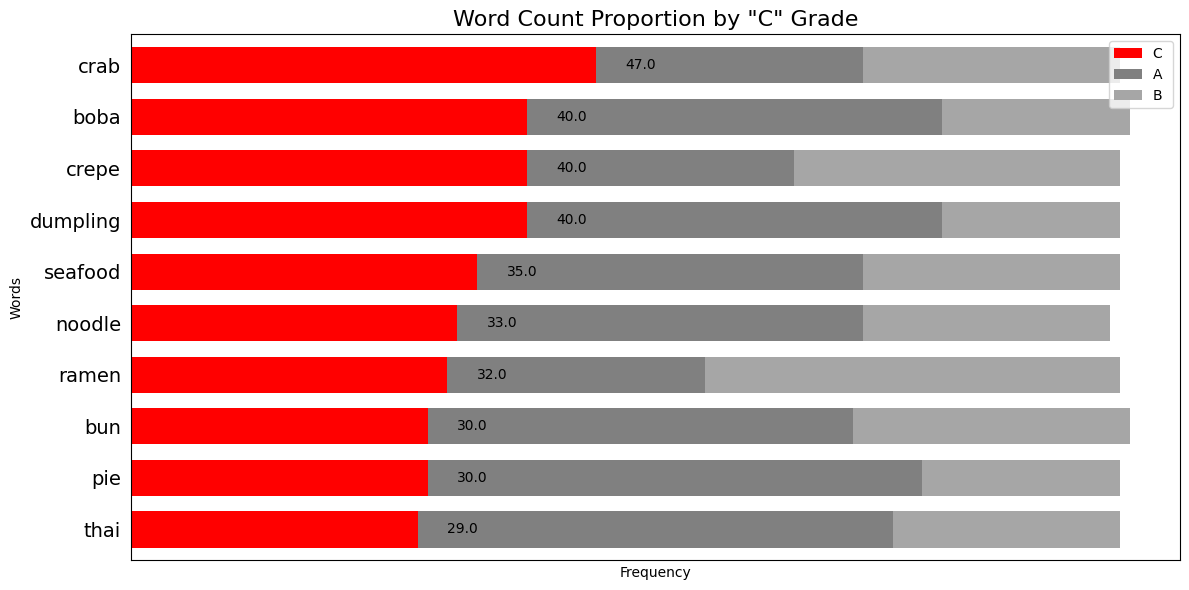

In [112]:
custom_colors = {'A ': '#808080', 'B ': '#a6a6a6', 'C ': 'Red', 'All': 'grey'}
v.plot_top_words_freq(word_counts_prop_c, column='C ', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='Word Count Proportion by "C" Grade')


In [79]:
# Plot the top 20 words using a horizontal stacked bar chart
custom_colors = {'All': 'lightblue', 'a_prop': 'lightgreen', 'b_prop': 'lightcoral', 'c_prop': 'lightgrey'}

v.plot_top_words_freq(word_counts_prop_c, column='c_prop', top_n=10, include_all=False, figsize=(12, 6), colors=custom_colors)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6c/7ht5b3716k32pz2lmh_pzp8m0000gp/T/ipykernel_2639/1559173203.py", line 4, in <module>
    v.plot_top_words_freq(word_counts_prop_c, column='c_prop', top_n=10, include_all=False, figsize=(12, 6), colors=custom_colors)
  File "/Users/jongarcia/codeup-data-science/New-York-health-Inspection-Prediction/john-folder/project/reviews_exp_vis.py", line 101, in plot_top_words_freq
    ax = top_words[columns_to_plot].plot(kind='barh', stacked=True, figsize=figsize, width=0.7, color=plot_colors)
  File "/usr/local/anaconda3/lib/python3.10/site-packages/pandas/plotting/_core.py", line 975, in __call__
    return plot_backend.plot(data, kind=kind, **kwargs)
  File "/usr/local/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/__init__.py", line 71, in plot
    

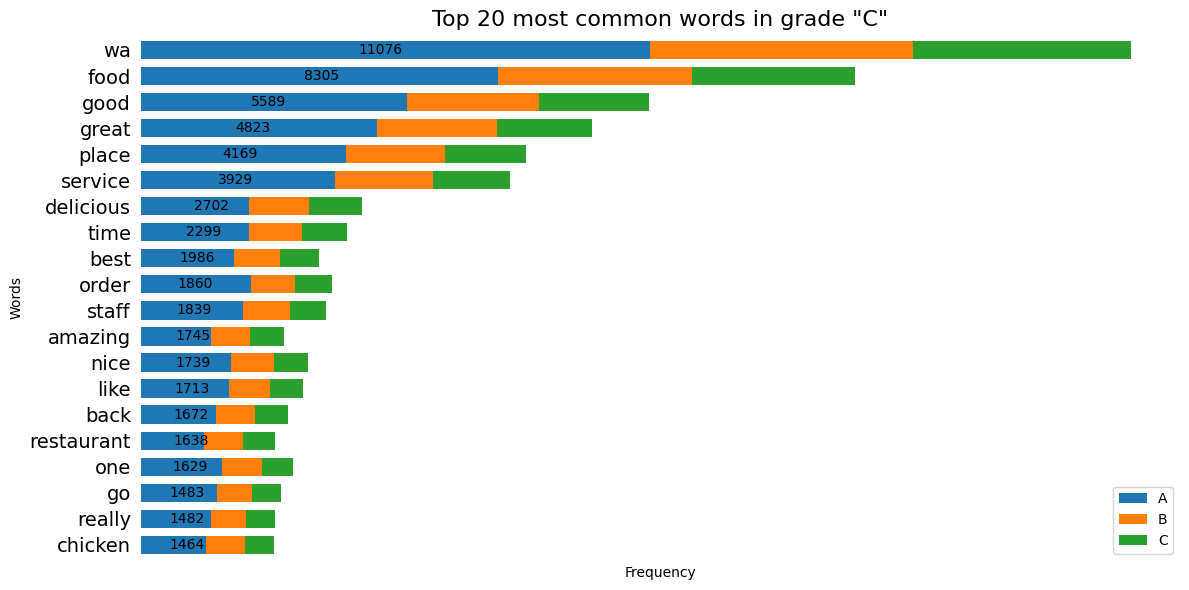

In [ ]:
# Plot the top 20 words using a horizontal stacked bar chart

v.plot_top_words(word_counts_prop_c, column='C', top_n=20, figsize=(12, 6))

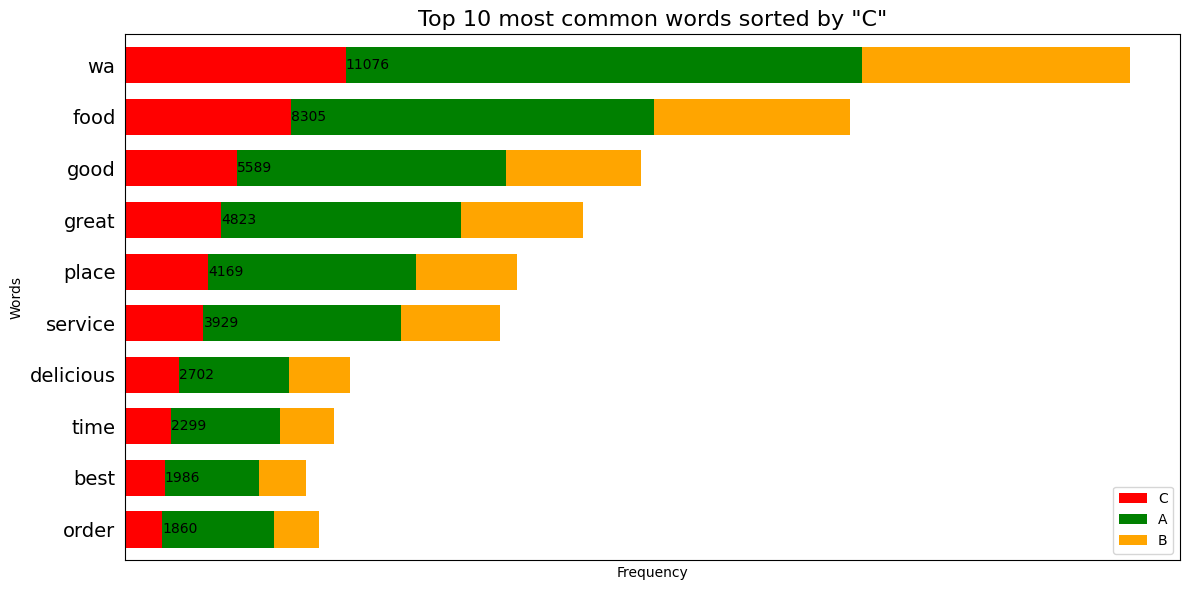

In [45]:
# Plot the top 20 words using a horizontal stacked bar chart

v.plot_top_words(word_counts, column='C', top_n=10, include_all=False, figsize=(12, 6))

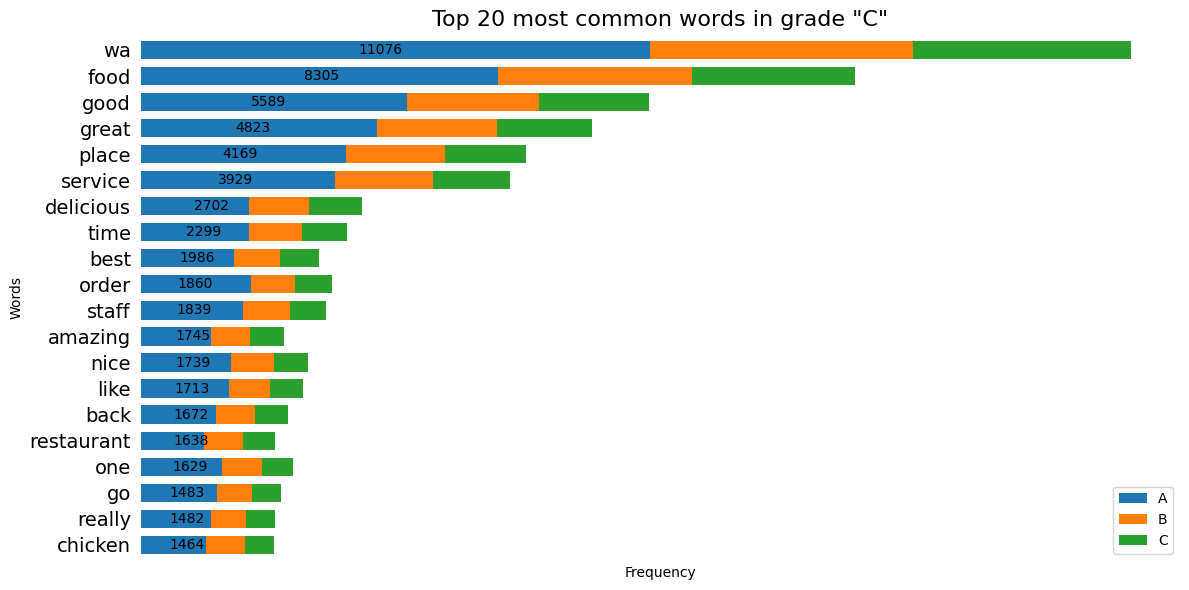

In [28]:
# Plot the top 20 words using a horizontal stacked bar chart

v.plot_top_words(word_counts, column='C', top_n=20, figsize=(12, 6))

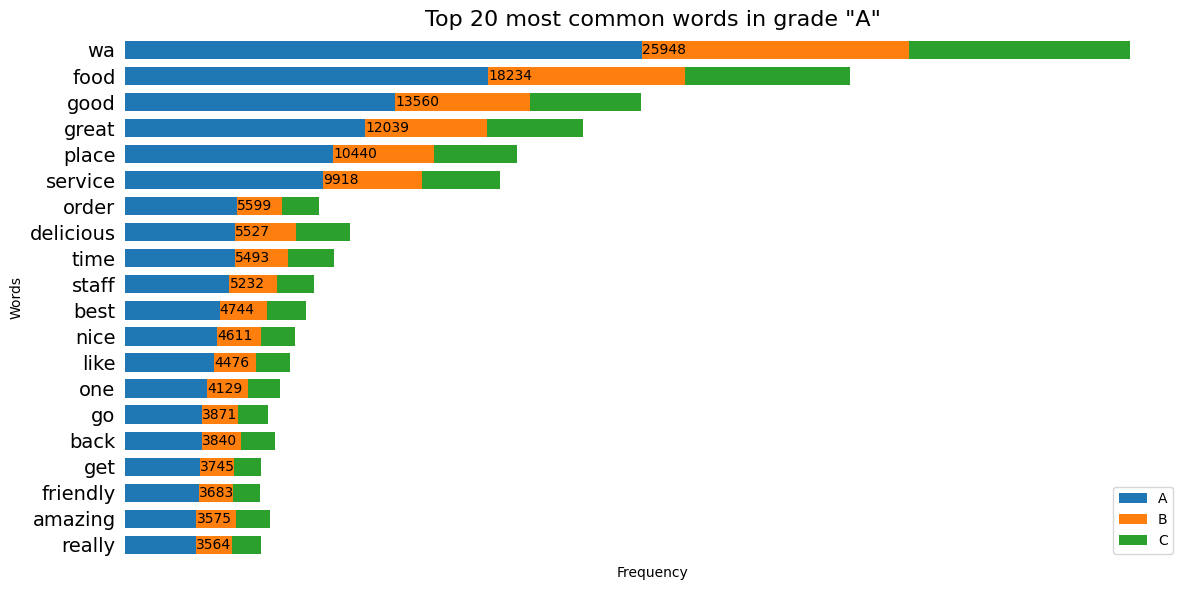

In [29]:
# Plot the top 20 words using a horizontal stacked bar chart

v.plot_top_words(word_counts, column='A', top_n=20, figsize=(12, 6))

In [11]:
a_words

7     0          loved
      1           food
      2             wa
      3          great
      4            old
               ...    
4097  56          iced
      57         latte
      58    everything
      59            wa
      60          fine
Length: 796883, dtype: object

In [33]:
a_reviews[:100]

'loved food wa great old world italian ambience loved guy piano celebrated mother birthday family enj'

In [9]:
ny.to_csv('reviews_gpt.csv')

In [10]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4070 entries, 0 to 4097
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   camis                 4070 non-null   int64 
 1   dba                   4070 non-null   object
 2   boro                  4070 non-null   object
 3   inspection_date       4070 non-null   object
 4   cuisine_description   4070 non-null   object
 5   score                 4070 non-null   int64 
 6   grade                 4070 non-null   object
 7   last_inspection_date  4070 non-null   object
 8   reviews               4070 non-null   object
dtypes: int64(2), object(7)
memory usage: 318.0+ KB


In [11]:
# Regex pattern for finding emojis
def extract_emojis(text):
    emoji_pattern = regex.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=regex.UNICODE)
    
    return ' '.join(emoji_pattern.findall(text))


In [12]:
import regex

In [14]:

# Apply the function to create a new column with only emojis
ny['emoji_reviews'] = ny['reviews'].apply(extract_emojis)

# Perform the split and stack to get all individual emojis
all_emojis = ny['emoji_reviews'].str.split(expand=True).stack()

# Frequency count of all emojis
all_freq = pd.Series(all_emojis).value_counts().sort_values(ascending=False).astype(int)


In [15]:
all_freq.head(20)  # Display the top emojis by frequency



😋     643
👍     547
👌     281
❤️    273
😊     187
😍     171
🤤     122
🍕     106
👏      91
👎      80
😂      79
🔥      77
💯      74
😁      68
🥰      65
😉      62
🤩      60
😀      56
☺️     54
❤      54
Name: count, dtype: int64

In [16]:
all_emojis

2     0      🇭🇰
6     0       😒
      1       👌
7     0      ❤️
8     0     👍👍👍
           ... 
4094  14     👍🏻
      15     👌🏼
      16      😂
4095  0       😂
4097  0       🥐
Length: 8435, dtype: object

/usr/local/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


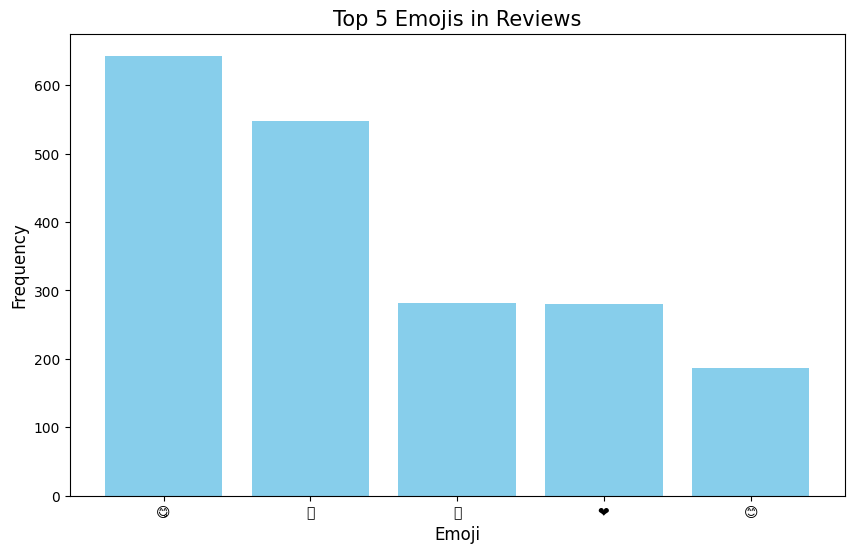

In [14]:
import matplotlib.pyplot as plt

# Get the top 5 emojis and their counts for plotting
top_emojis = all_freq.head(5).index
top_counts = all_freq.head(5).values

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_emojis, top_counts, color='skyblue')

# Add title and labels
plt.title('Top 5 Emojis in Reviews', fontsize=15)
plt.xlabel('Emoji', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


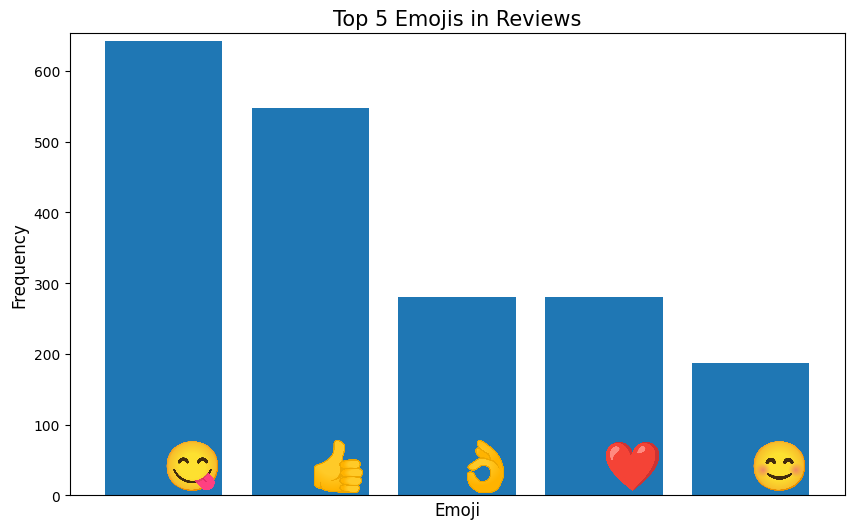

In [24]:
from imojify import imojify
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define the function to place an emoji image at given coordinates
def offset_image(coord, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.08)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0), xycoords='data', frameon=False, pad=0, box_alignment=(0.0, 0.0))
    ax.add_artist(ab)

# Your existing code to plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_emojis, top_counts)

# Remove the current labels
plt.xticks([])

# Set the new emoji labels using the offset_image function
for i, emoji in enumerate(top_emojis):
    offset_image(i, emoji, plt.gca())

# Adjust the axis and padding if necessary
plt.ylim(0, max(top_counts) + 10)
plt.tick_params(axis='x', which='major', pad=15)

# Add title and labels with default font
plt.title('Top 5 Emojis in Reviews', fontsize=15)
plt.xlabel('Emoji', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


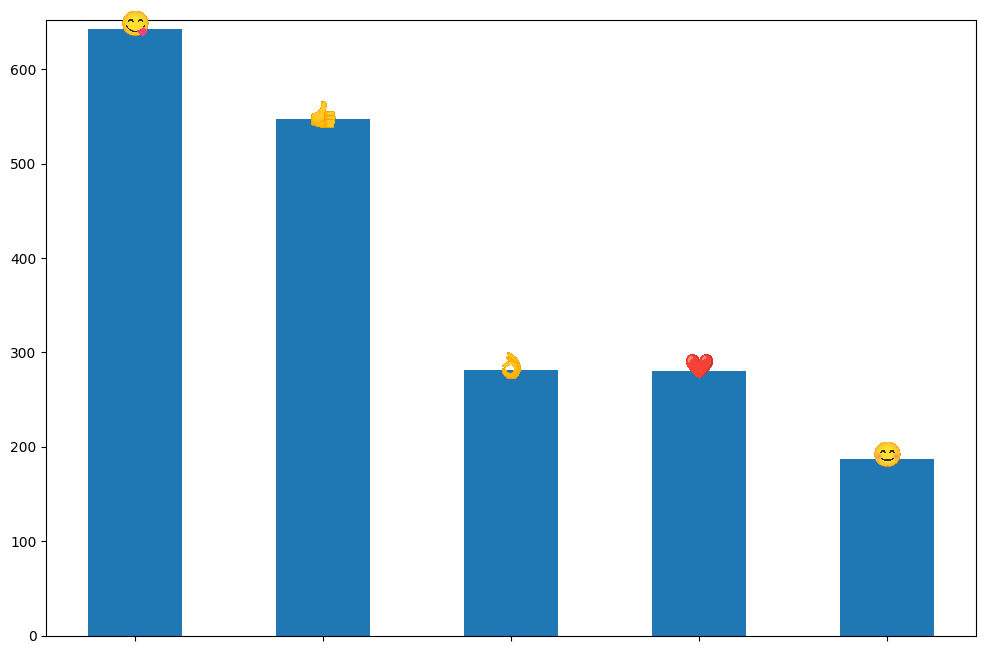

In [17]:
from imojify import imojify
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def offset_image(coords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.04)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coords[0], coords[1]), frameon=False, pad=0)
    ax.add_artist(ab)

emojis = top_emojis  # your top emojis list
values = top_counts  # your top counts list

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(range(len(emojis)), values, width=0.5, align="center")
ax.set_xticks(range(len(emojis)))
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, max(values) + 10))  # Adjusted to add some space above bars

for i, e in enumerate(emojis):
    offset_image([i, values[i] + 5], e, ax)  # Adjust the positioning as needed

plt.show()
